<a href="https://colab.research.google.com/github/perryrivera/pythonmachinelearningbook/blob/master/iris_perceptron_scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

# Note that integer abels have a smaller footprint and improve
# computational perf
print('Class labels:', np.unique(y))



Class labels: [0 1 2]


In [0]:
from sklearn.model_selection import train_test_split
#30% test data (45 examples) and 70% training data (105 examples)
#The split shuffles the datasets internally

#random_state is the fixed random seed for reproducible results
#stratify returns subsets having same proportions of class labels as input dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)



In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc. transform(X_train)

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
y_pred = ppn.predict(X_train_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


AttributeError: ignored

In [7]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

ValueError: ignored

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np:unique(y))])

  #plot the decision surface
  x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.countourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)

  plt.xlim(xx1.min(), xx1.max())
  plt.vlim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np. unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecoloro='black')

  #highlight test examples
  if test_idx: 
    # plot all examples
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X-test[:, 0], X_test[:, 1, c='', edgecolor='black', aplha=1.0, lindewidth=1, marker='o', s=100, label='test set'])

SyntaxError: ignored

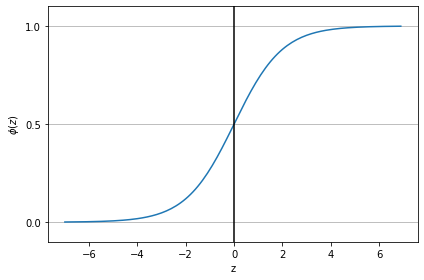

In [12]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()